In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_context("talk")

In [24]:
cell_type = 'CD14'

remove_samples = ["GSM973587.common",
                "GSM973588.common",
                "GSM973589.common",
                "GSM973592.common",]
 

# Read in Nanostringnorm normalized data

In [5]:
path = "/home/gus/MEGAsync/zim/main/BCH/Projects/James/Nanostring_pipeline/OKT3/output/20160316_CD14_vs_others/generate_starting_data_tables/CD14_vs_others_nanostring_starting_data.csv"

In [13]:
cmb_data_ = pd.read_csv(path)
cmb_data = cmb_data_.set_index('Name')
del(cmb_data.index.name)
cmb_data.head()

,CodeClass,Accession,BWH006_CD14_w0_04.common,BWH008_CD14_w0_09.common,GSM973583.common,GSM973584.common,GSM973585.common,GSM973586.common,GSM973587.common,GSM973588.common,GSM973589.common,GSM973590.common,GSM973591.common,GSM973592.common,MGH001_CD14_w0_07.common,MGH002_CD14_w0_05.common,MGH004_CD14_w0_09.common,MGH007_CD14_w0_10.common
VTN,Endogenous,NM_000638.3,1,0,326,865,827,561,158,214,377,676,977,444,4,0,2,1
HLA-DQB1,Endogenous,NM_002123.3,8,8,2923,4689,5768,4359,1995,1644,2783,6182,5641,3178,2,11,0,2
KIT,Endogenous,NM_000222.2,2,0,130,163,282,443,197,128,149,251,739,282,3,1,3,2
SOCS3,Endogenous,NM_003955.3,11,23,241,361,381,283,129,99,191,402,396,242,387,15,7,206
TCF7,Endogenous,NM_003202.2,0,1,21,22,19,30,13,13,19,23,20,10,3,1,0,1


## OK lets get rid of CodeClass and Accession Columns and write to file

In [14]:
cmb_data_extra_cols = cmb_data[['CodeClass','Accession']].copy()

cmb_data = cmb_data.drop(labels=['CodeClass','Accession'],axis=1)


In [17]:
cmb_data.T.head()

,VTN,HLA-DQB1,KIT,SOCS3,TCF7,IKBKB,ITGA6,CXCR4,NFKBIZ,MAPK14,...,HPRT1,GAPDH,SDHA,OAZ1,PPIA,G6PD,RPL19,POLR1B,ABCF1,ALAS1
BWH006_CD14_w0_04.common,1,8,2,11,0,5,1,16,13,14,...,0,98,2,48,5,4,73,0,6,3
BWH008_CD14_w0_09.common,0,8,0,23,1,5,3,20,27,19,...,11,152,3,86,5,13,201,1,6,6
GSM973583.common,326,2923,130,241,21,129,2407,37,28,174,...,5243,81,28,15,19,14,21,34,9,19
GSM973584.common,865,4689,163,361,22,159,3449,26,19,206,...,4402,48,29,19,29,17,17,31,7,12
GSM973585.common,827,5768,282,381,19,212,4638,33,32,283,...,4651,81,31,16,23,19,19,31,12,13


In [15]:
print cmb_data.columns.values

['BWH006_CD14_w0_04.common' 'BWH008_CD14_w0_09.common' 'GSM973583.common'
 'GSM973584.common' 'GSM973585.common' 'GSM973586.common'
 'GSM973587.common' 'GSM973588.common' 'GSM973589.common'
 'GSM973590.common' 'GSM973591.common' 'GSM973592.common'
 'MGH001_CD14_w0_07.common' 'MGH002_CD14_w0_05.common'
 'MGH004_CD14_w0_09.common' 'MGH007_CD14_w0_10.common']


## Now make the Targets table and merge with data

In [18]:
targets = cmb_data.T.iloc[:,0:2].copy()
targets[u'source'] = targets.index.values
targets.source = targets.source.apply(lambda i: 'THEIRS' if i.startswith('GSM') else 'OURS' )
targets = pd.DataFrame(targets.source)
targets

,source
BWH006_CD14_w0_04.common,OURS
BWH008_CD14_w0_09.common,OURS
GSM973583.common,THEIRS
GSM973584.common,THEIRS
GSM973585.common,THEIRS
GSM973586.common,THEIRS
GSM973587.common,THEIRS
GSM973588.common,THEIRS
GSM973589.common,THEIRS
GSM973590.common,THEIRS


In [19]:
cmb_nrm = pd.merge(left=targets, right=cmb_data.T, 
                   how='inner', on=None, 
                   left_on=None, right_on=None, 
                   left_index=True, right_index=True, 
                   sort=False, suffixes=('_x', '_y'), copy=True, indicator=False)
cmb_nrm.head()

,source,VTN,HLA-DQB1,KIT,SOCS3,TCF7,IKBKB,ITGA6,CXCR4,NFKBIZ,...,HPRT1,GAPDH,SDHA,OAZ1,PPIA,G6PD,RPL19,POLR1B,ABCF1,ALAS1
BWH006_CD14_w0_04.common,OURS,1,8,2,11,0,5,1,16,13,...,0,98,2,48,5,4,73,0,6,3
BWH008_CD14_w0_09.common,OURS,0,8,0,23,1,5,3,20,27,...,11,152,3,86,5,13,201,1,6,6
GSM973583.common,THEIRS,326,2923,130,241,21,129,2407,37,28,...,5243,81,28,15,19,14,21,34,9,19
GSM973584.common,THEIRS,865,4689,163,361,22,159,3449,26,19,...,4402,48,29,19,29,17,17,31,7,12
GSM973585.common,THEIRS,827,5768,282,381,19,212,4638,33,32,...,4651,81,31,16,23,19,19,31,12,13


## Group by source and apply mean after removing flagged

In [25]:
cmb_nrm = cmb_nrm.drop(labels=remove_samples, axis=0)
cmb_nrm

,source,VTN,HLA-DQB1,KIT,SOCS3,TCF7,IKBKB,ITGA6,CXCR4,NFKBIZ,...,HPRT1,GAPDH,SDHA,OAZ1,PPIA,G6PD,RPL19,POLR1B,ABCF1,ALAS1
BWH006_CD14_w0_04.common,OURS,1,8,2,11,0,5,1,16,13,...,0,98,2,48,5,4,73,0,6,3
BWH008_CD14_w0_09.common,OURS,0,8,0,23,1,5,3,20,27,...,11,152,3,86,5,13,201,1,6,6
GSM973583.common,THEIRS,326,2923,130,241,21,129,2407,37,28,...,5243,81,28,15,19,14,21,34,9,19
GSM973584.common,THEIRS,865,4689,163,361,22,159,3449,26,19,...,4402,48,29,19,29,17,17,31,7,12
GSM973585.common,THEIRS,827,5768,282,381,19,212,4638,33,32,...,4651,81,31,16,23,19,19,31,12,13
GSM973586.common,THEIRS,561,4359,443,283,30,298,4672,29,30,...,4963,75,29,15,19,18,18,32,14,10
GSM973590.common,THEIRS,676,6182,251,402,23,133,5132,27,39,...,5041,100,32,11,26,18,24,21,11,11
GSM973591.common,THEIRS,977,5641,739,396,20,200,4975,28,21,...,4338,59,24,12,22,22,15,27,9,8
MGH001_CD14_w0_07.common,OURS,4,2,3,387,3,22,10,490,113,...,57,2283,38,735,36,84,1701,13,46,44
MGH002_CD14_w0_05.common,OURS,0,11,1,15,1,7,2,25,12,...,6,216,4,86,4,11,193,1,7,0


In [26]:
cmb_nrm_mean = cmb_nrm.groupby('source').mean()
cmb_nrm_mean = cmb_nrm_mean.T
cmb_nrm_mean

source,OURS,THEIRS
VTN,1.333333,705.333333
HLA-DQB1,5.166667,4927.000000
KIT,1.833333,334.666667
SOCS3,108.166667,344.000000
TCF7,1.000000,22.500000
IKBKB,19.500000,188.500000
ITGA6,4.166667,4212.166667
CXCR4,179.666667,30.000000
NFKBIZ,77.833333,28.166667
MAPK14,76.833333,189.833333


## Start plotting Finally

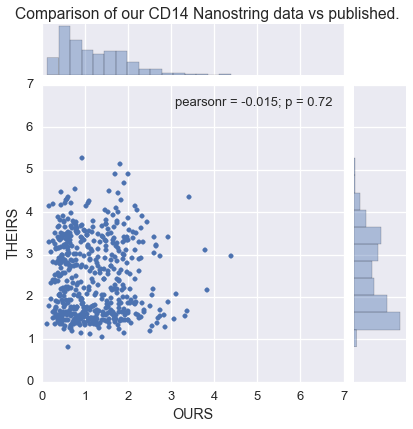

In [28]:
sns.jointplot(x='OURS', y='THEIRS',
              data=np.log10(cmb_nrm_mean+1), kind='scatter',
              xlim=(0,7), ylim=(0,7)
             );

plt.suptitle("Comparison of our {cell} Nanostring data vs published.".format(cell=cell_type), y=1,);

### Lets look at the external controls

In [30]:
cmb_data_extra_cols.head()

,CodeClass_OUR,Accession_OUR,CodeClass_THR,Accession_THR
VTN,Endogenous,NM_000638.3,Endogenous,NM_000638.3
HLA-DQB1,Endogenous,NM_002123.3,Endogenous,NM_002123.3
KIT,Endogenous,NM_000222.2,Endogenous,NM_000222.1
SOCS3,Endogenous,NM_003955.3,Endogenous,NM_003955.3
TCF7,Endogenous,NM_003202.2,Endogenous,NM_003202.2


In [31]:
cmb_data_extra_cols.CodeClass_OUR.unique()

array(['Endogenous', 'Positive', 'Negative', 'Housekeeping'], dtype=object)

In [32]:
cmb_data_extra_cols.CodeClass_THR.unique()

array(['Endogenous', 'Positive', 'Negative'], dtype=object)

In [33]:
pos_ctrl = list(cmb_data_extra_cols.query(""" CodeClass_OUR == "Positive" """).index.values)
neg_ctrl = list(cmb_data_extra_cols.query(""" CodeClass_OUR == "Negative" """).index.values)
hsk_gene = list(cmb_data_extra_cols.query(""" CodeClass_OUR == "Housekeeping" """).index.values)
bth_ctrl = pos_ctrl + neg_ctrl
pan_gene = list(cmb_data_extra_cols[cmb_data_extra_cols.CodeClass_OUR.apply(lambda i: i in ['Housekeeping','Endogenous'])].index.values)

In [34]:
bth_ctrl

['POS_C(8)',
 'POS_A(128)',
 'POS_F(0.125)',
 'POS_D(2)',
 'POS_B(32)',
 'POS_E(0.5)',
 'NEG_C(0)',
 'NEG_D(0)',
 'NEG_E(0)',
 'NEG_A(0)',
 'NEG_H(0)',
 'NEG_G(0)',
 'NEG_F(0)',
 'NEG_B(0)']

In [35]:
cmb_cpm_mean.head()

source,OURS,THEIRS
VTN,27.268306,17.888145
HLA-DQB1,279.626299,1395.749960
KIT,54.113462,25.036577
SOCS3,1204.189985,3443.938653
TCF7,21.901164,40.591074


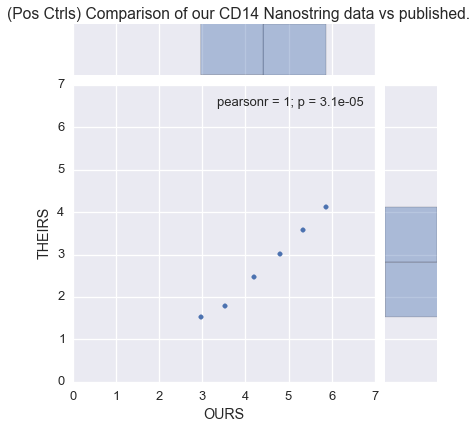

In [44]:
sns.jointplot(x='OURS', y='THEIRS',
              data=np.log10(cmb_cpm_mean.loc[pos_ctrl]+1), kind='scatter',
              xlim=(0,7), ylim=(0,7)
             );

plt.suptitle("(Pos Ctrls) Comparison of our {cell} Nanostring data vs published.".format(cell=cell_type), y=1,);

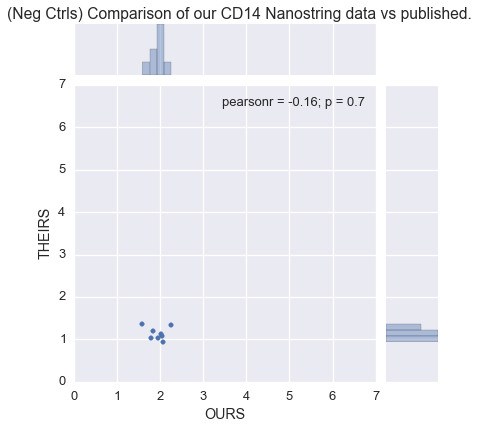

In [45]:
sns.jointplot(x='OURS', y='THEIRS',
              data=np.log10(cmb_cpm_mean.loc[neg_ctrl]+1), kind='scatter',
              xlim=(0,7), ylim=(0,7)
             );

plt.suptitle("(Neg Ctrls) Comparison of our {cell} Nanostring data vs published.".format(cell=cell_type), y=1,);

In [38]:
cmb_cpm_mean.loc[neg_ctrl].head()

source,OURS,THEIRS
NEG_C(0),179.277108,20.998254
NEG_D(0),60.870736,9.856633
NEG_E(0),106.585016,12.274479
NEG_A(0),109.453229,11.059749
NEG_H(0),68.211021,14.408876


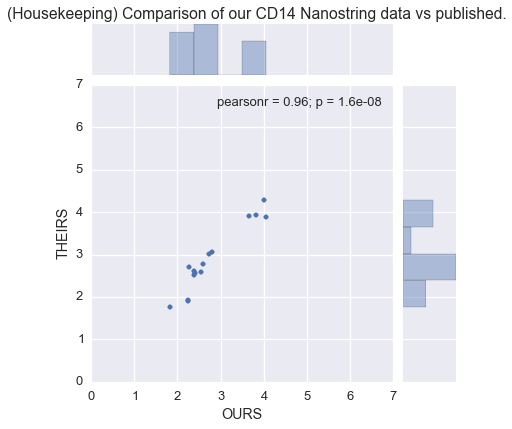

In [46]:
sns.jointplot(x='OURS', y='THEIRS',
              data=np.log10(cmb_cpm_mean.loc[hsk_gene]+1), kind='scatter',
              xlim=(0,7), ylim=(0,7)
             );

plt.suptitle("(Housekeeping) Comparison of our {cell} Nanostring data vs published.".format(cell=cell_type), y=1,);

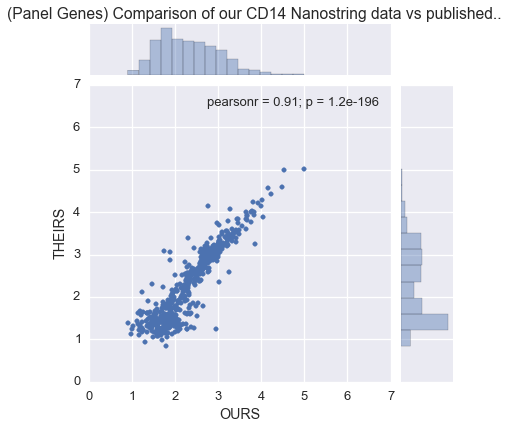

In [49]:
sns.jointplot(x='OURS', y='THEIRS',
              data=np.log10(cmb_cpm_mean.loc[pan_gene]+1), kind='scatter',
              xlim=(0,7), ylim=(0,7)
             );

plt.suptitle("(Panel Genes) Comparison of our {cell} Nanostring data vs published..".format(cell=cell_type), y=1,);